# Data visually utilize python

In [2]:
import os 
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors

2


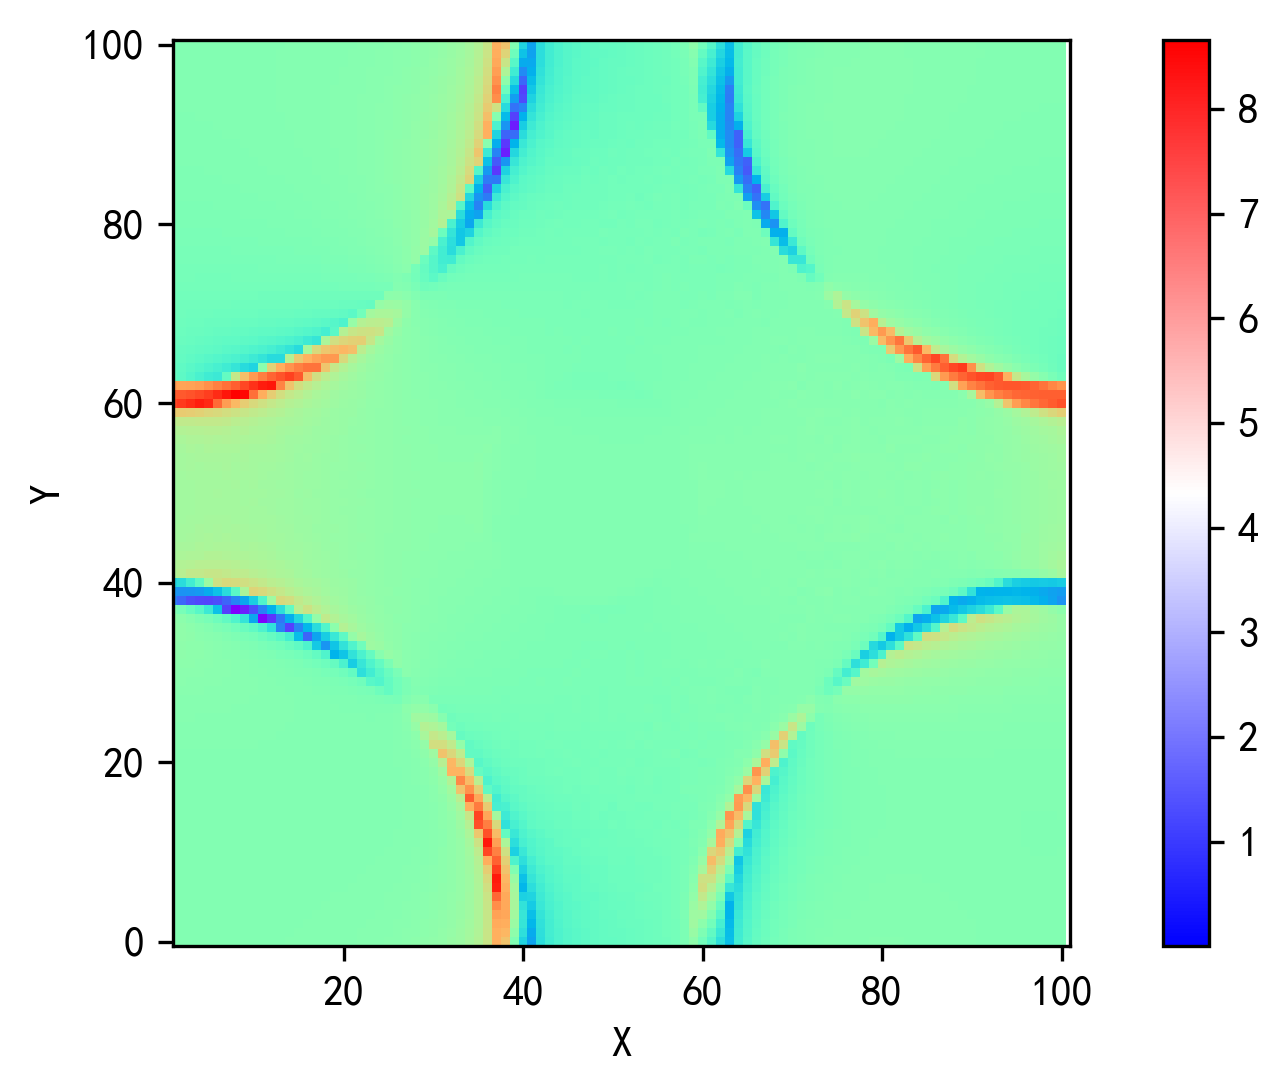

<Figure size 2400x1200 with 0 Axes>

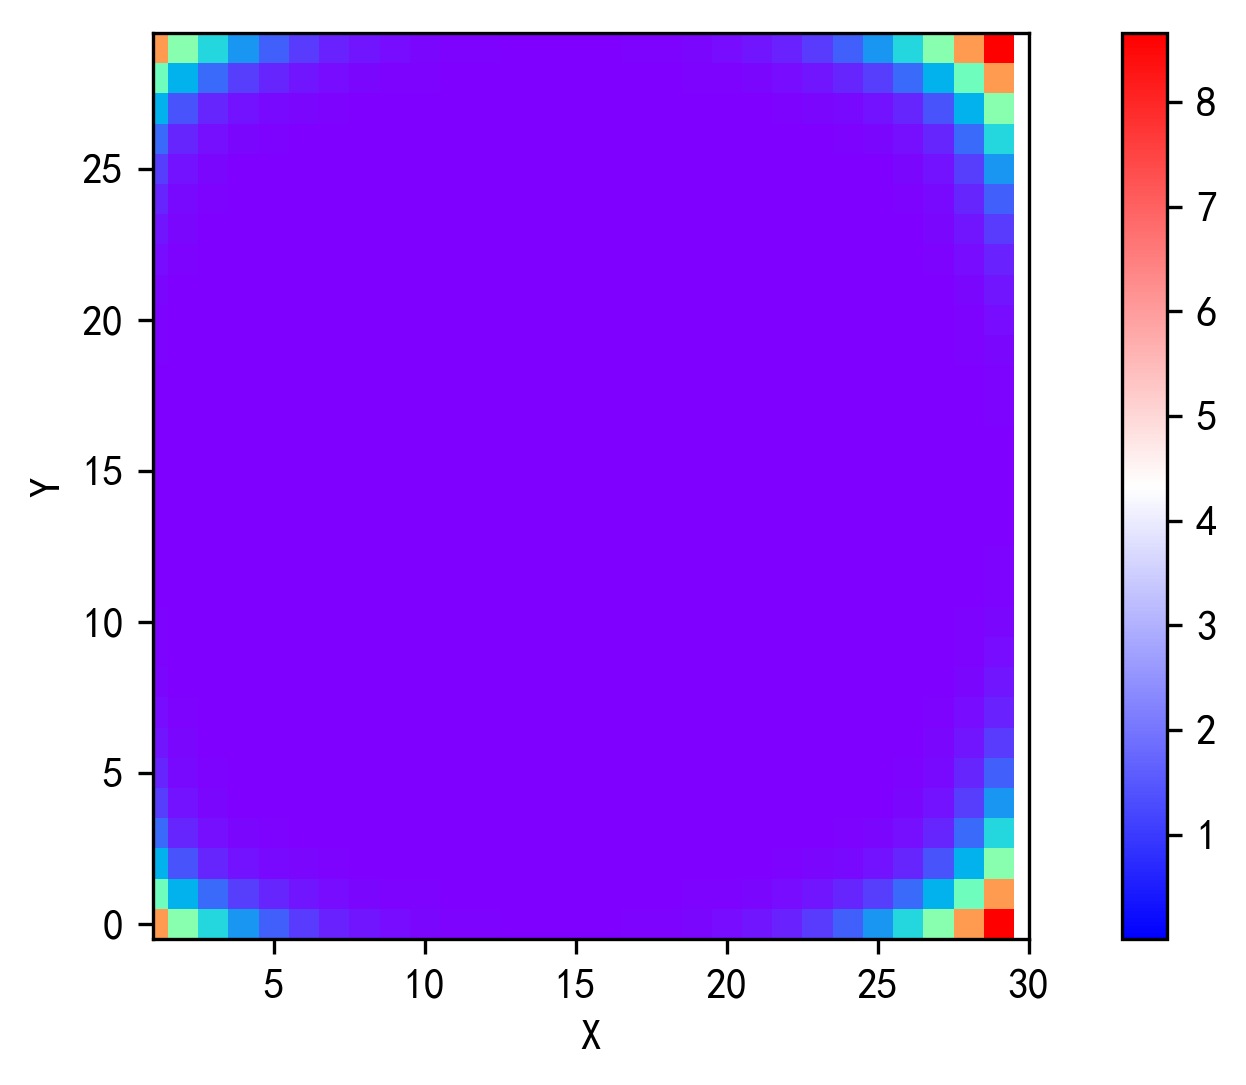

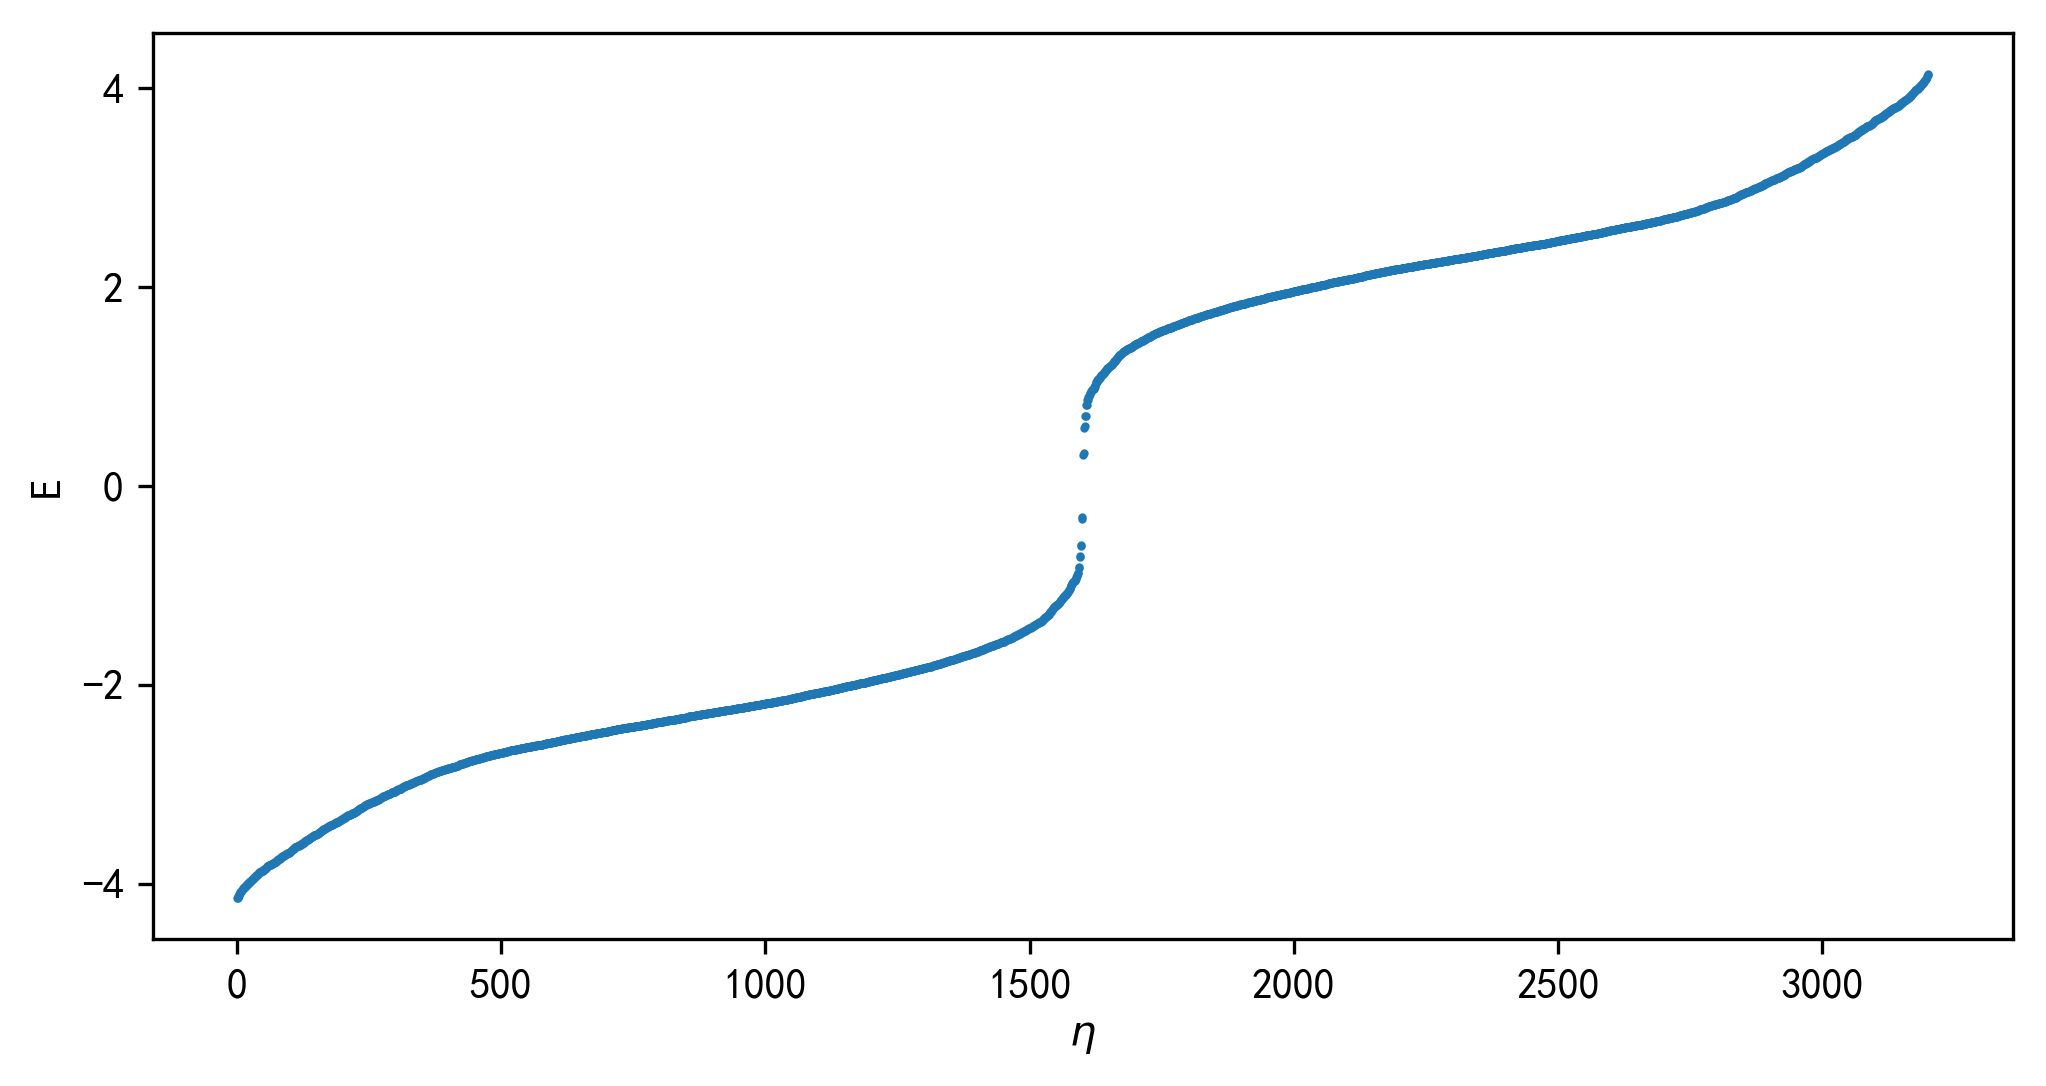

<Figure size 2400x1200 with 0 Axes>

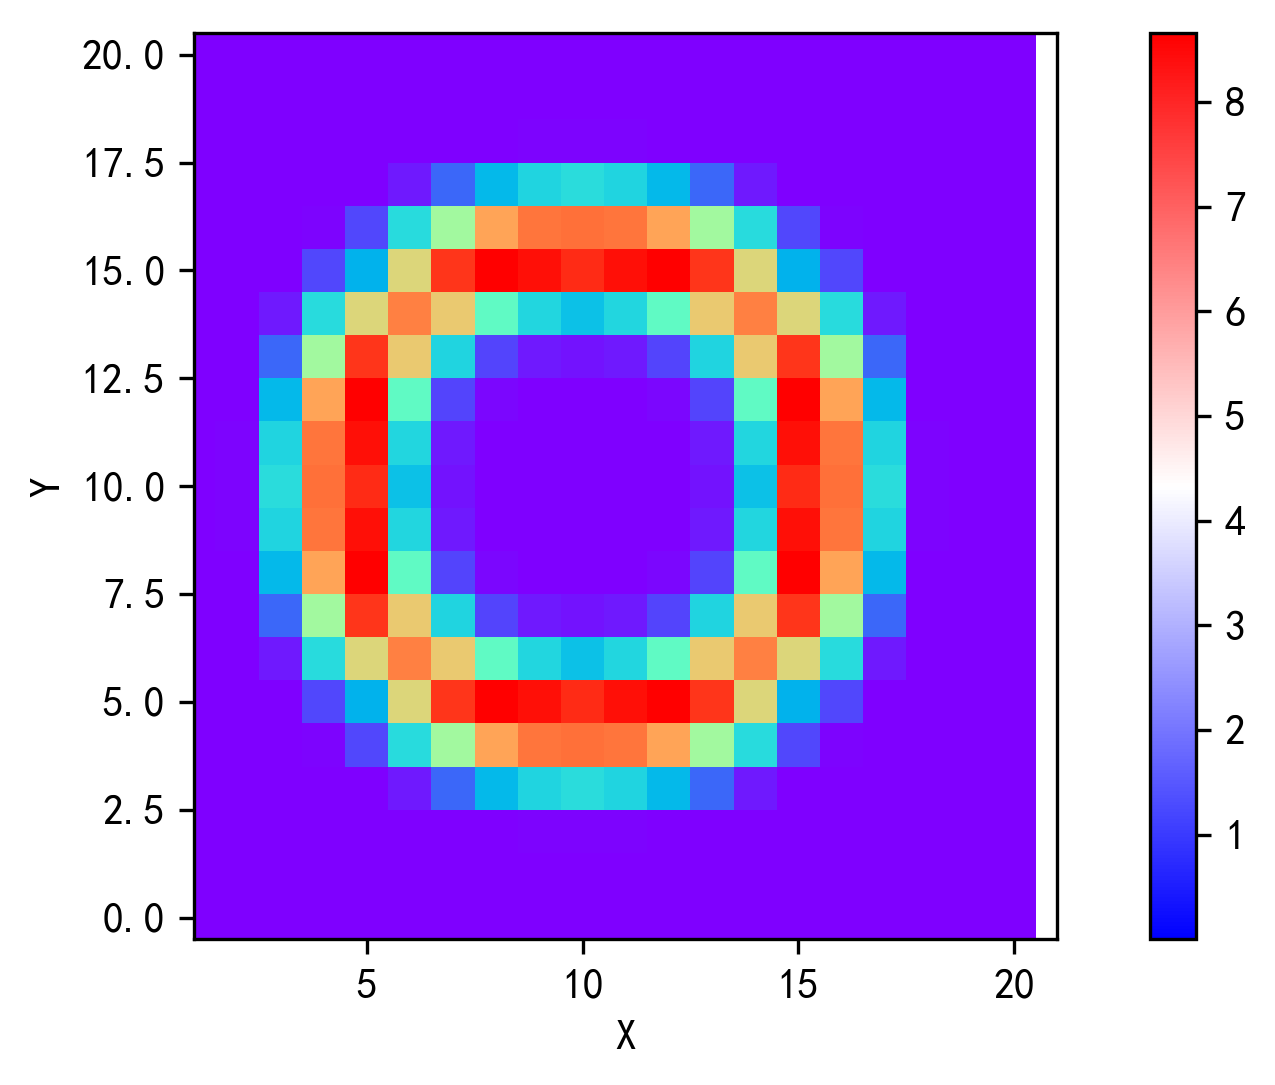

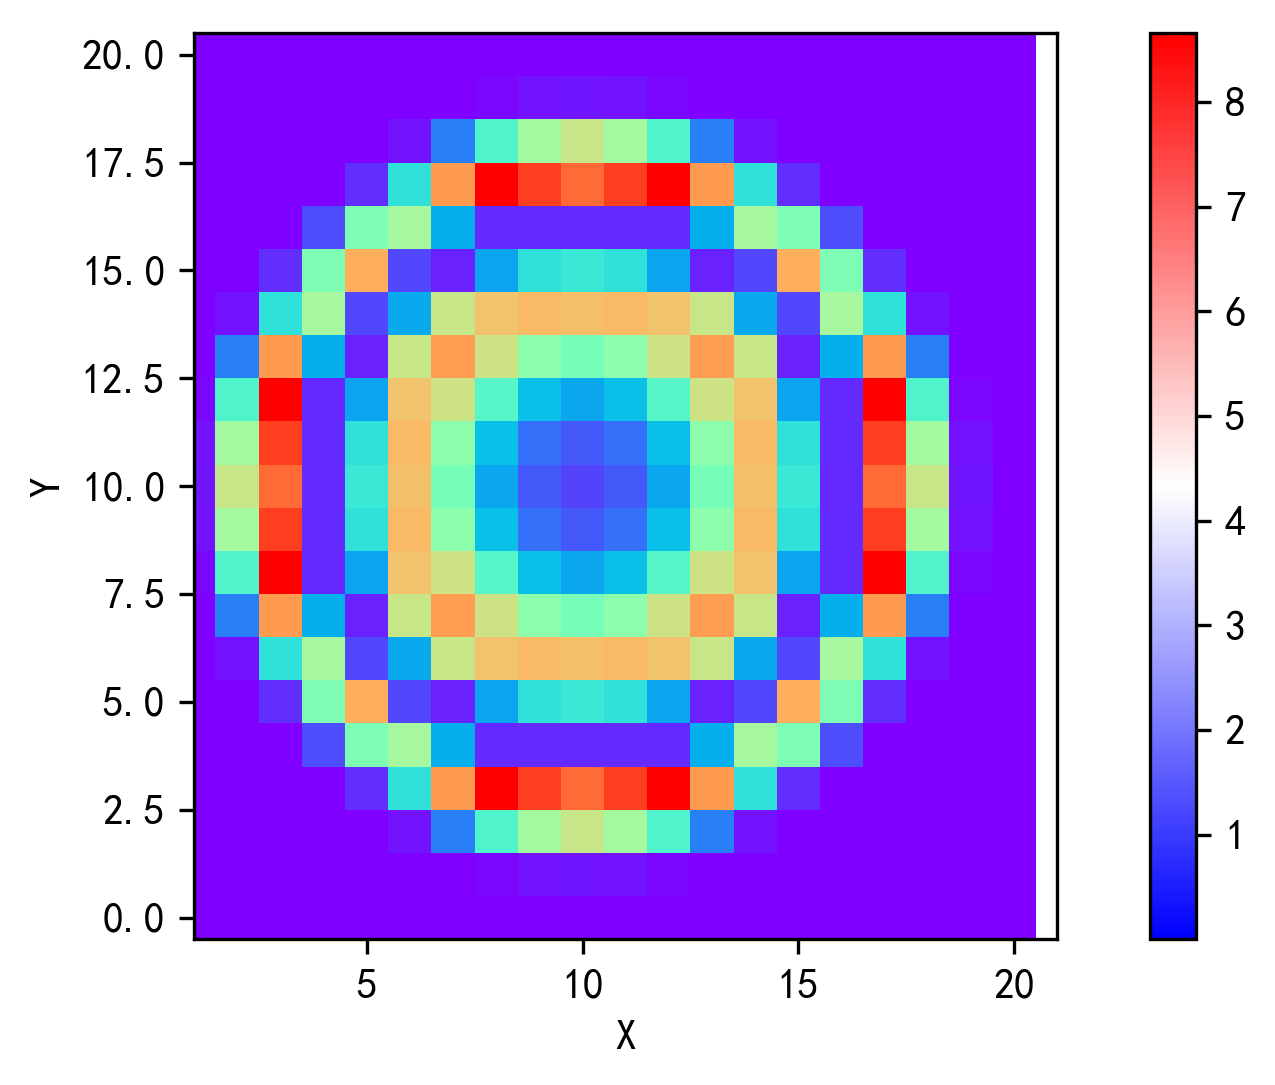

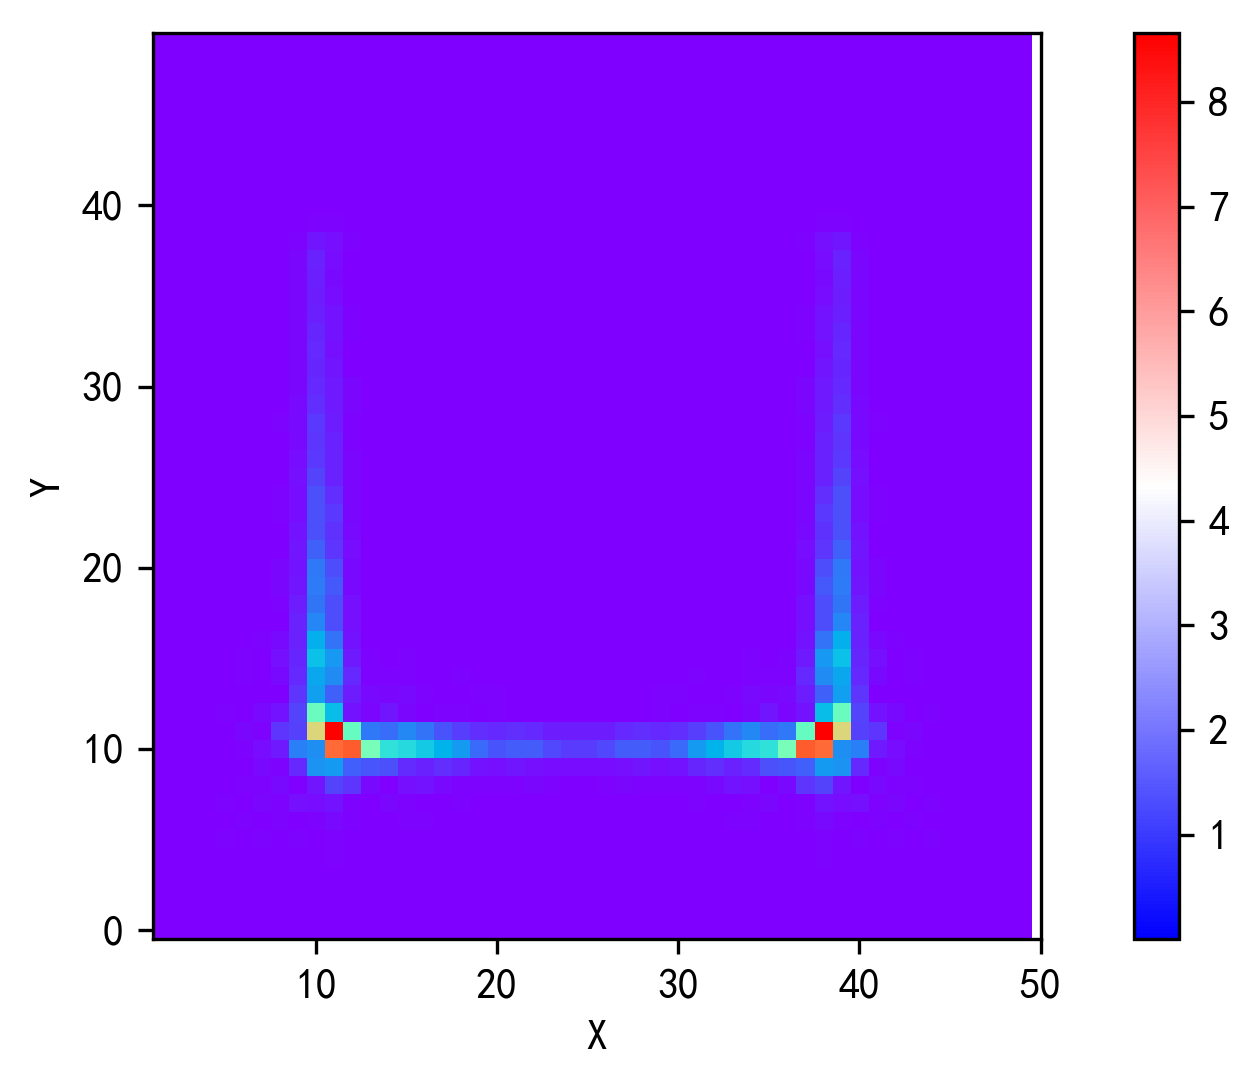

In [39]:
filePath = os.getcwd()
filelist = os.listdir(filePath)    # 获取目录下所有的文件
datlist=[]
for m in range(0,len(filelist)-1):
    if filelist[m].endswith(".dat"):    # 刷选dat格式的文件
        datlist.append(filelist[m])     # dat格式文件
#----------------------------------------------
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
#plt.rcParams['font.sans-serif']=['SimHei']  # 标题中文设置
#plt.rcParams['axes.unicode_minus'] = False
# 默认的像素：[6.0,4.0]，分辨率为100，图片尺寸为 600&400
# 指定dpi=200，图片尺寸为 1200*800
# 指定dpi=300，图片尺寸为 1800*1200
# 设置figsize可以在不改变分辨率情况下改变比例

#-------------------------------------------------
# 生成图片格式自定义
def colormap():
  # 白青绿黄红
  cdict = ['#FFFFFF', '#9ff113', '#5fbb44', '#f5f329', '#e50b32']
  # 按照上面定义的colordict，将数据分成对应的部分，indexed：代表顺序
  return colors.ListedColormap(cdict, 'indexed')

        
#------------------------------------------
for m in range(0,len(datlist)):
    filename = datlist[m]
    x,y,z = [],[],[]
    with open(filename, 'r') as f:#1
        lines = f.readlines()#2
        dim = 0
        for line in lines:#3
            value = [float(s) for s in line.split()]#4
            x.append(value[0])#5 
            if len(value)>1:
                dim = 2
                y.append(value[1])
            if len(value)>2:
                dim = 3
                z.append(value[2])
            if len(value)>3:
                dim = 4
    picname = filename.split(".")[0]
    picname = picname+".eps"
    plt.figure(figsize=(8,4))
    if dim ==2:
        print(dim)
        plt.scatter(x,y,s= 1)
        plt.xlabel('$\eta$') # 这一段
        plt.ylabel("E") # 这一段
        plt.savefig(picname, dpi=300) #指定分辨率保存
        plt.show()
    if dim==3:
        length = int(np.sqrt(len(z)))
        z = np.reshape(z,(length,length))
        #plt.imshow(z)
        cmap = mpl.cm.bwr # 蓝，白，红
        #plt.imshow(z, cmap=cmap)
        #plt.imshow(z,cmap=my_cmap)
        #----------
        cmap = mpl.cm.rainbow
        # 这里设置colormap的固定值
        norm = mpl.colors.Normalize(vmin=-1, vmax=1)
        #plt.colorbar(im,cmap=cmap, norm=norm,ticks=[-1,0,1])
        plt.colorbar(im,cmap=cmap, norm=norm)
        plt.xlabel('X') # 这一段
        plt.ylabel('Y') # 这一段
        plt.xlim(1,length)
        plt.imshow(z,cmap=cmap,origin="lower")  #  plt.cm.cool
        plt.savefig(picname, dpi=300) #指定分辨率保存

## Topological energy band